In [98]:
import pandas as pd # analysing and organize data
import numpy as np # efficently work with data using arrays
import matplotlib.pyplot as plt #to create 2D chart and plot
%matplotlib inline 
import seaborn as sns #python data visualization library using matplot lib
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5) #resampling 
from sklearn import metrics

In [99]:
data = pd.read_csv('arrhythmia.csv',header=None)
data.head()



,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [100]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [101]:
data.shape

(452, 280)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [103]:
data.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.0,47.0,58.0,83.0
1,452.0,0.550885,0.497955,0.0,0.0,1.0,1.0,1.0
2,452.0,166.188053,37.170340,105.0,160.0,164.0,170.0,780.0
3,452.0,68.170354,16.590803,6.0,59.0,68.0,79.0,176.0
4,452.0,88.920354,15.364394,55.0,80.0,86.0,94.0,188.0


In [104]:
# replacing missing data  with NaN's:
count=0
for i in range(0,452):
    for j in range(0,280):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
data = data.replace('?', np.NaN)

408


Text(0, 0.5, 'Count of NaN')

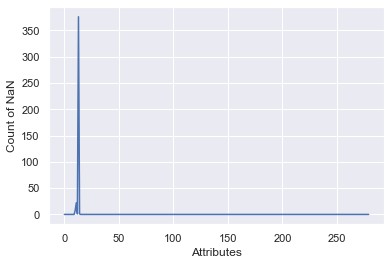

In [105]:
 #distribution of our missing data: 
pd.isnull(data).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Text(0, 0.5, 'Count of NaN')

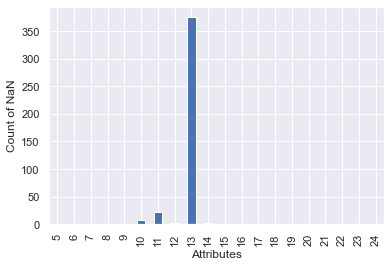

In [106]:
#zooming in :
pd.isnull(data).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [107]:

data.drop(columns = 13, inplace=True)

In [108]:
data_no_missing = data.fillna(0)

Text(0, 0.5, 'Count of NaN')

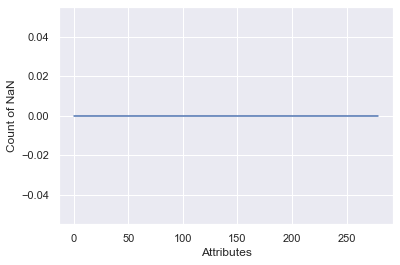

In [109]:
pd.isnull(data_no_missing).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [110]:
data_no_missing=pd.DataFrame(data_no_missing)
data_no_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [111]:
#Adding column names
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

In [112]:
X = data_no_missing.drop(columns = 279)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [113]:
X.columns = X_columns
X.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [114]:
y = data[279]
y.head()


0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

In [115]:
y.columns = ["Class"]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

In [116]:
sorted(data[279], reverse=True)

[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

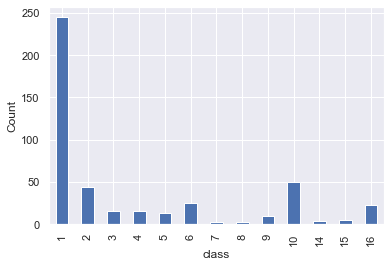

In [117]:
data[279].value_counts().sort_index().plot(kind='bar')
plt.xlabel('class');
plt.ylabel('Count');


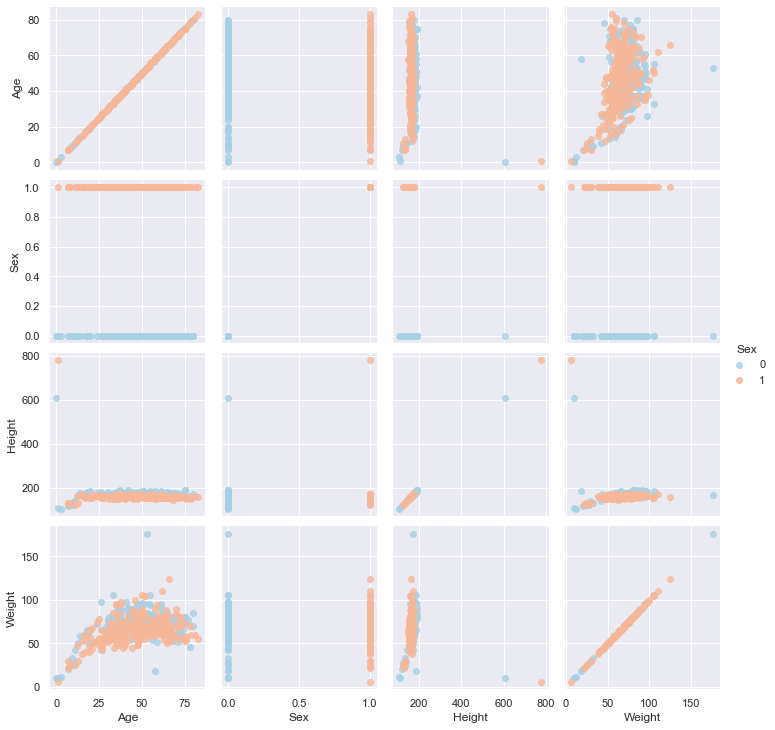

In [118]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [119]:
sorted(X['Height'], reverse=True)[:10]

[780, 608, 190, 190, 190, 188, 186, 186, 186, 185]

In [120]:
X['Height']=X['Height'].replace(608,108)
X['Height']=X['Height'].replace(780,180)

In [121]:
sorted(X['Weight'], reverse=True)[:10]


[176, 124, 110, 106, 105, 105, 104, 104, 100, 98]

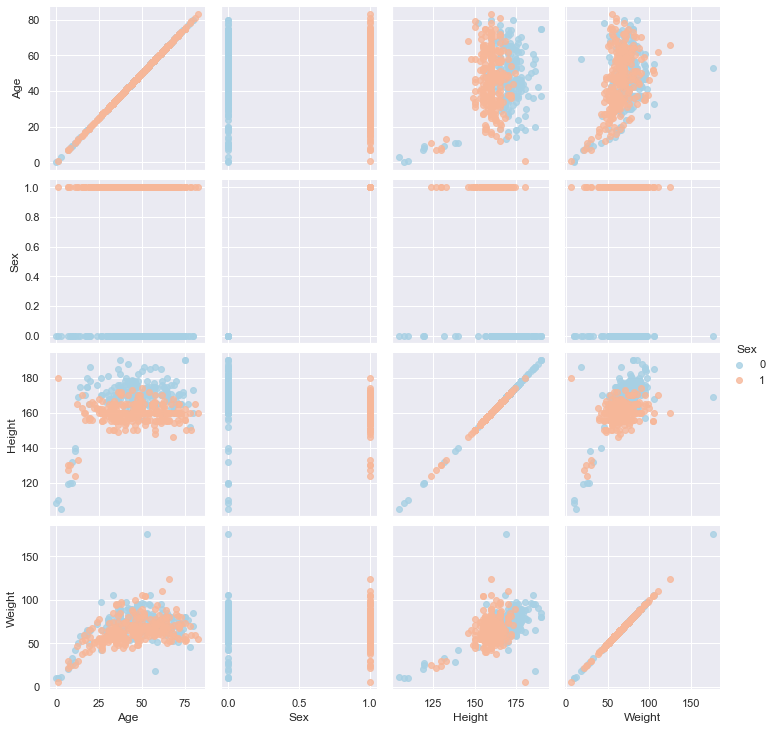

In [122]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

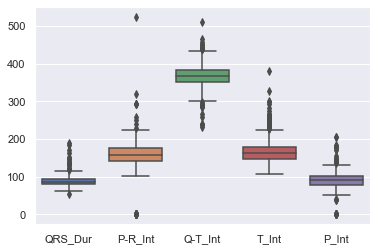

In [123]:
sns.boxplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

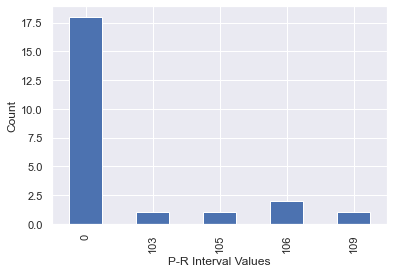

In [124]:
X['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

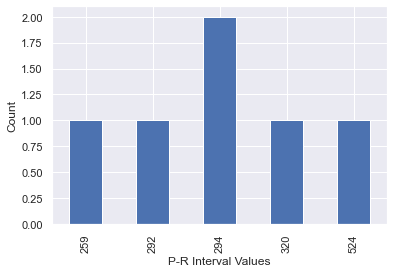

In [125]:
X['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

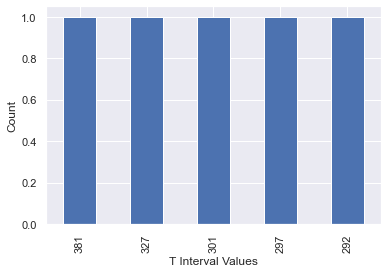

In [126]:
X['T_Int'].value_counts().sort_index(ascending=False).head().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

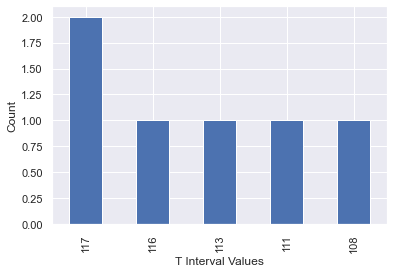

In [127]:
X['T_Int'].value_counts().sort_index(ascending=False).tail().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

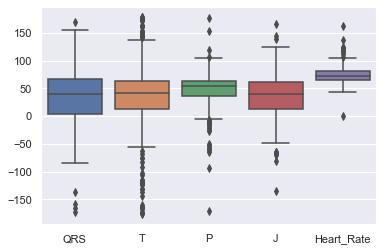

In [128]:
sns.boxplot(data=X[["QRS","T","P","J","Heart_Rate"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

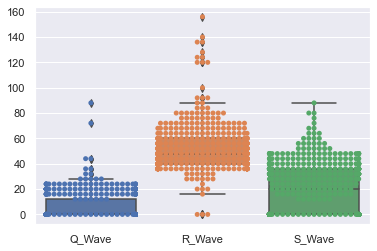

In [129]:
sns.boxplot(data=X[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=X[["Q_Wave","R_Wave","S_Wave"]]);

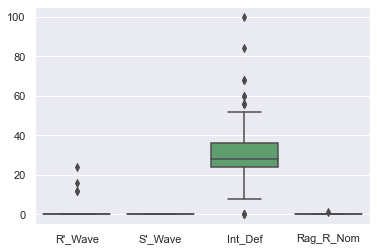

In [130]:
sns.boxplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);


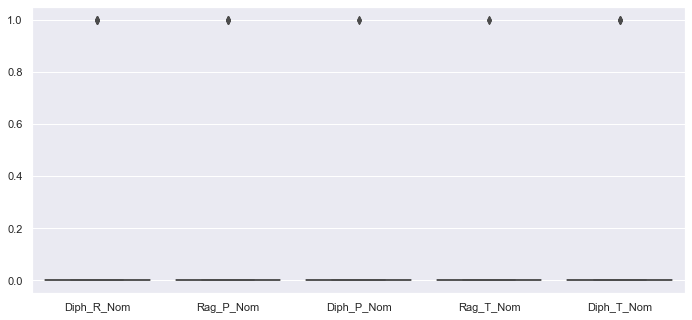

In [131]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]]);

In [132]:
X["Diph_R_Nom"].value_counts().sort_index(ascending=False)

1      5
0    447
Name: Diph_R_Nom, dtype: int64

In [133]:
X["Rag_P_Nom"].value_counts().sort_index(ascending=False)

1      5
0    447
Name: Rag_P_Nom, dtype: int64

In [134]:
X["Diph_P_Nom"].value_counts().sort_index(ascending=False)

1      2
0    450
Name: Diph_P_Nom, dtype: int64

In [135]:
X["Rag_T_Nom"].value_counts().sort_index(ascending=False)

1      2
0    450
Name: Rag_T_Nom, dtype: int64

In [136]:
X["Diph_T_Nom"].value_counts().sort_index(ascending=False)

1      4
0    448
Name: Diph_T_Nom, dtype: int64

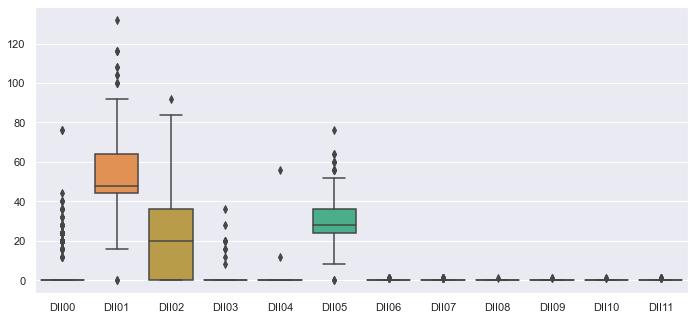

In [137]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]]);

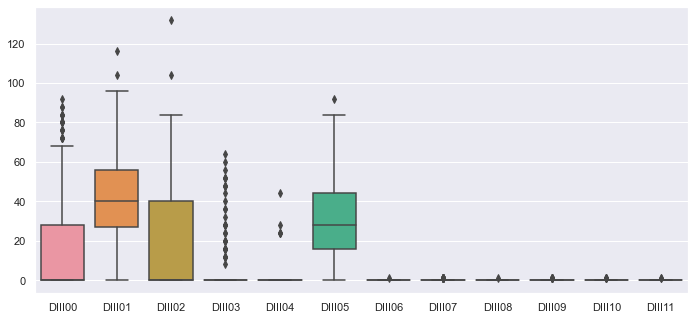

In [138]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06",
                       "DIII07","DIII08","DIII09","DIII10","DIII11"]]);

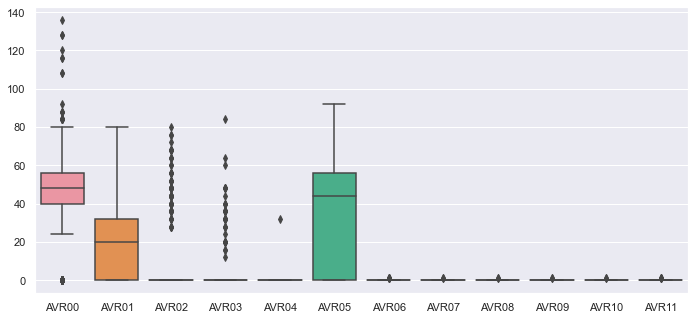

In [139]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR00","AVR01","AVR02","AVR03","AVR04","AVR05",
                       "AVR06","AVR07","AVR08","AVR09","AVR10","AVR11"]]);

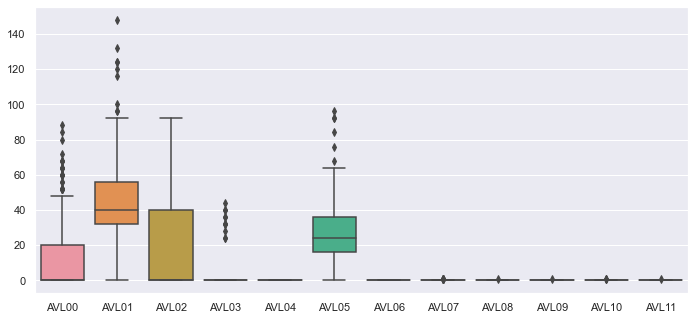

In [140]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11"]]);

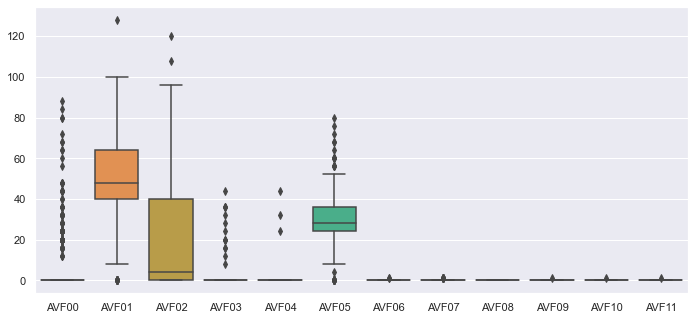

In [141]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11"]]);

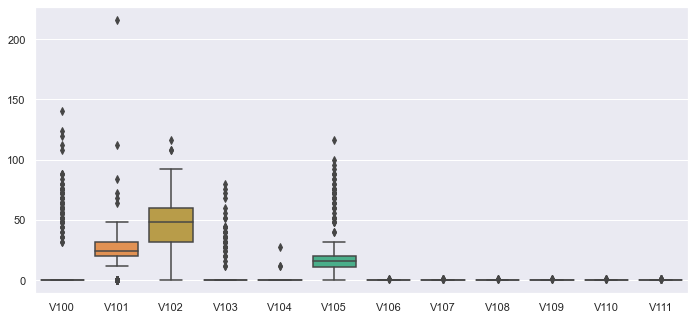

In [142]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111"]]);

In [143]:
X["V101"].value_counts().sort_index(ascending=False)

216     1
112     1
84      1
72      1
68      1
64      1
48      6
44      6
40     13
36     36
32     63
28     81
24     88
20     57
16     13
12      4
0      79
Name: V101, dtype: int64

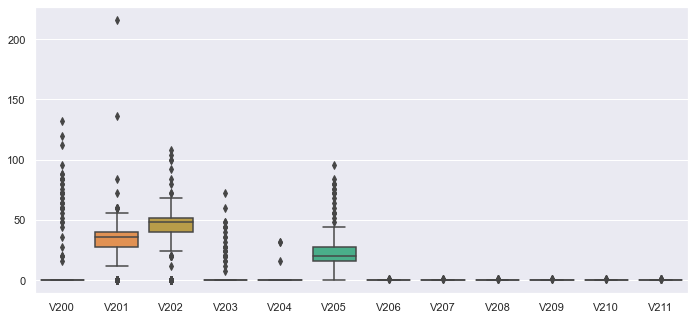

In [144]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211"]]);

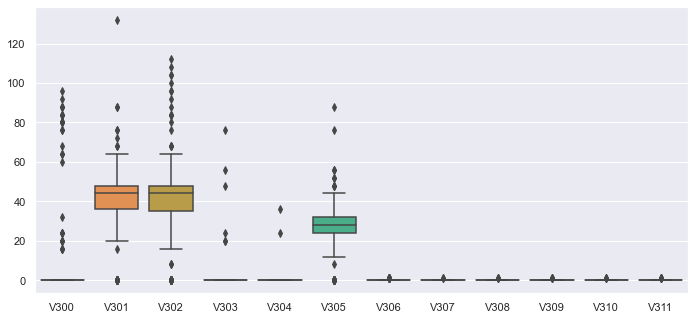

In [145]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311"]]);

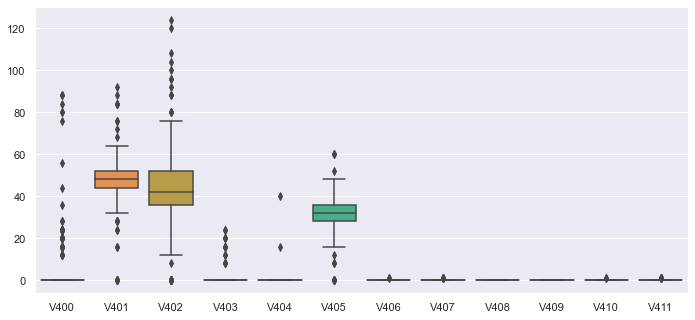

In [146]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411"]]);

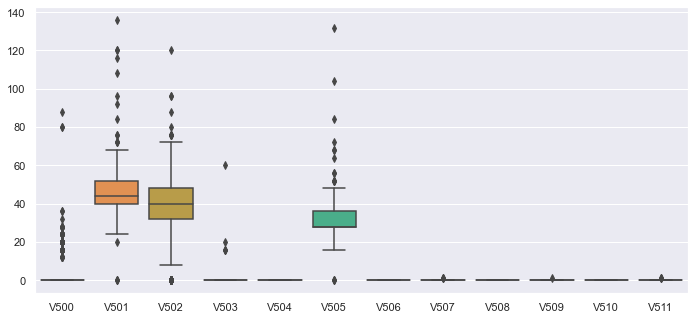

In [147]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511"]]);

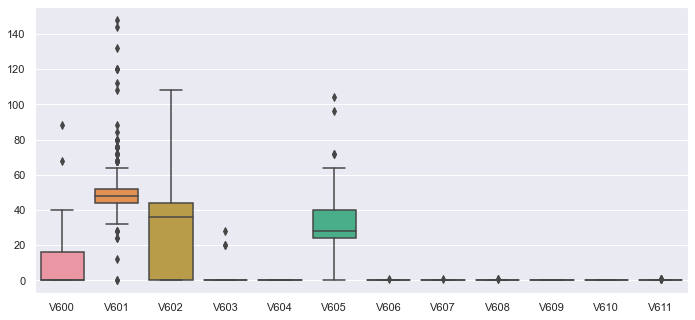

In [148]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611"]]);

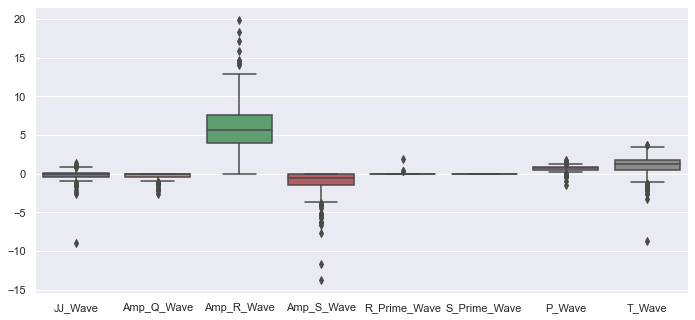

In [149]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave"]]);

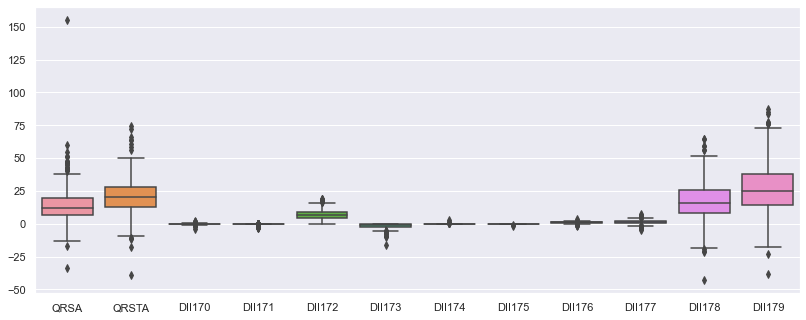

In [150]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=X[["QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179"]]);

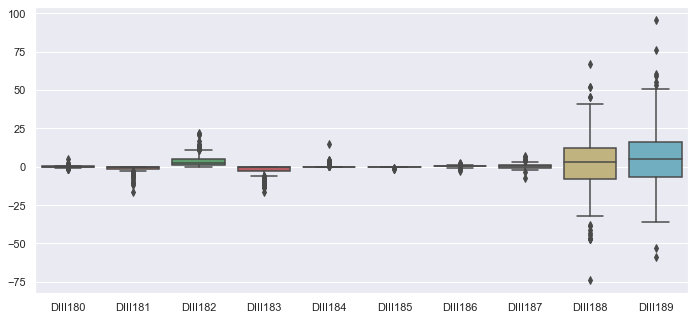

In [151]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189"]]);

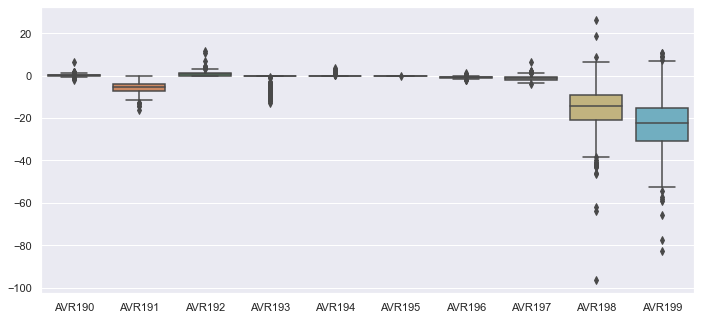

In [152]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

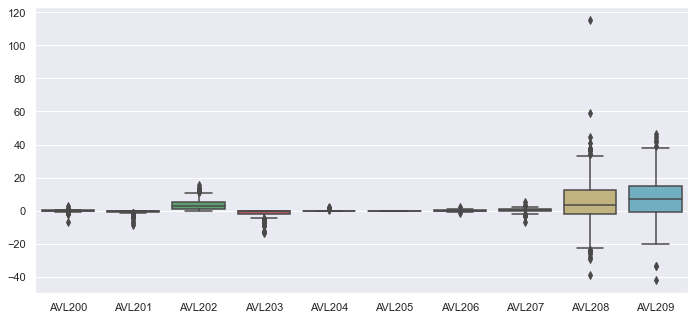

In [153]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

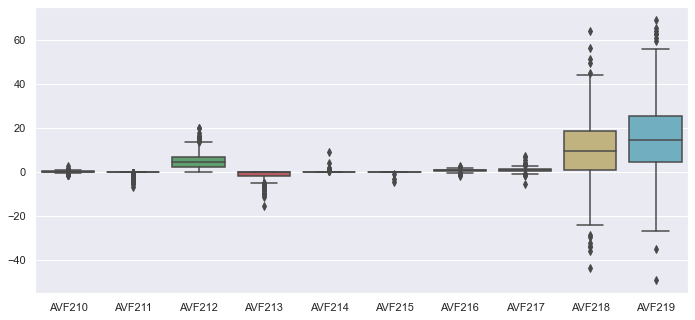

In [154]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

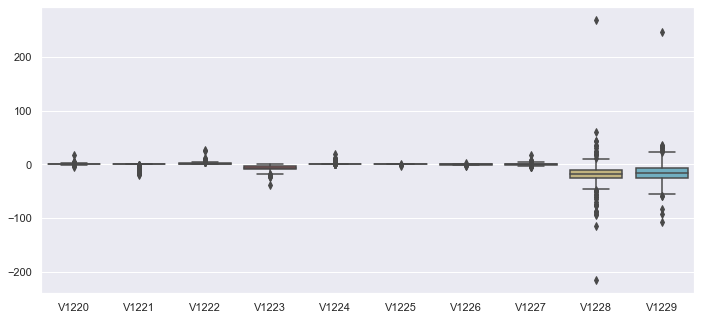

In [155]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229"]]);

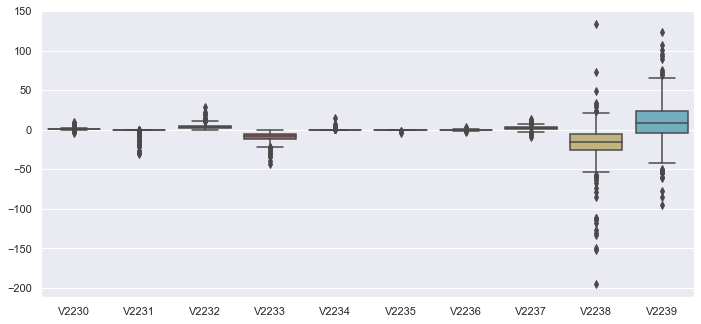

In [156]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239"]]);

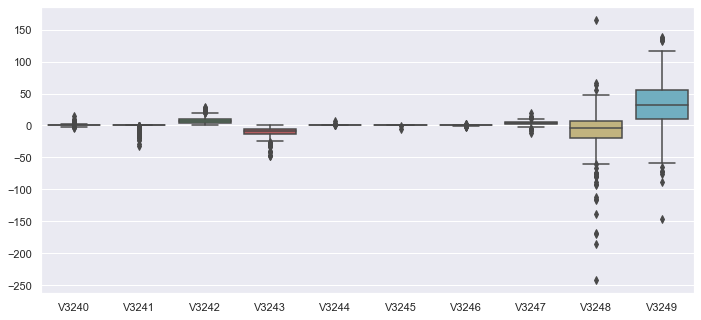

In [157]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249"]]);

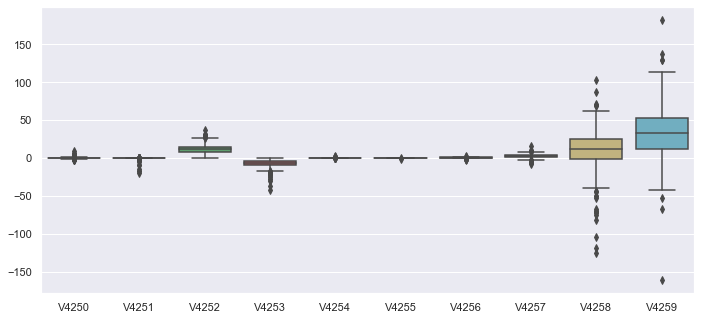

In [158]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259"]]);

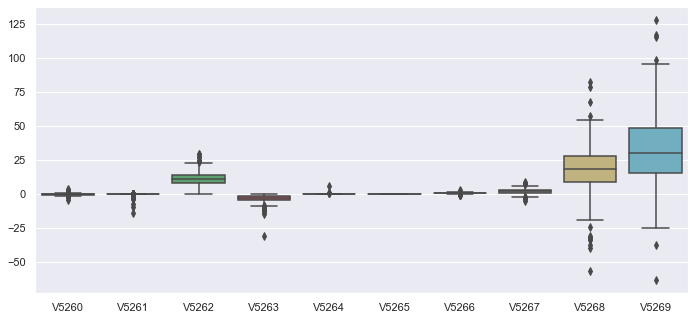

In [159]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269"]]);

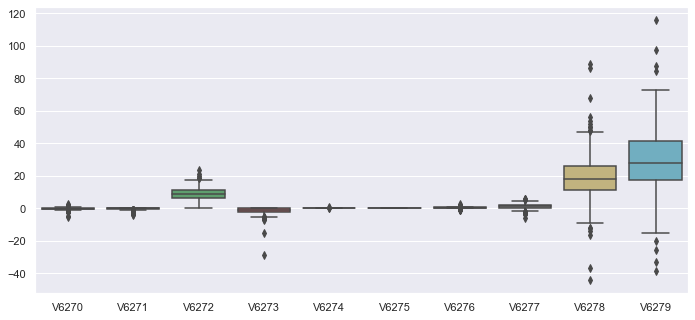

In [160]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]]);

### Train Test Split

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 10)

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[0.69879518 1.         0.64705882 ... 0.56666667 0.46691729 0.40711974]
 [0.26506024 1.         0.70588235 ... 0.3        0.73834586 0.39482201]
 [0.78313253 0.         0.78823529 ... 0.46666667 0.53082707 0.3987055 ]
 ...
 [0.56626506 1.         0.52941176 ... 0.64166667 0.46165414 0.45113269]
 [0.30120482 1.         0.67058824 ... 0.71666667 0.49924812 0.56828479]
 [0.42168675 1.         0.58823529 ... 0.56666667 0.41879699 0.35016181]]
[[0.80722892 0.         0.83529412 ... 0.625      0.33383459 0.34433657]
 [0.57831325 1.         0.70588235 ... 0.55       0.54661654 0.45501618]
 [0.89156627 0.         0.78823529 ... 0.71666667 0.51428571 0.56440129]
 ...
 [0.44578313 1.         0.64705882 ... 0.65       0.63383459 0.60906149]
 [0.40963855 0.         0.76470588 ... 0.71666667 0.66315789 0.69255663]
 [0.59036145 0.         0.76470588 ... 0.75       0.44736842 0.54304207]]


# Linear svc


In [163]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVC(multi_class='crammer_singer'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall_weighted')

In [164]:
grid_search.best_params_

{'C': 1}

In [165]:
grid_search.best_score_

0.70580997949419

In [166]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=0.1)
LSVC_clf.fit(X_train, y_train)

LinearSVC(C=0.1, multi_class='crammer_singer')

In [167]:
y_pred_train = LSVC_clf.predict(X_train)
y_pred_test = LSVC_clf.predict(X_test)

lsvc_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lsvc_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(lsvc_train_recall_score))
print('Test Recall score: {}'
      .format(lsvc_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7838541666666666
Test Recall score: 0.7205882352941176


array([[39,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 10, 20]},
             return_train_score=True, scoring='recall_weighted')

In [169]:
grid_search.best_params_

{'max_depth': 6}

In [170]:
grid_search.best_score_

0.6667464114832536

In [171]:
dt_clf = DecisionTreeClassifier(max_depth=20)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [172]:
from sklearn.metrics import accuracy_score

y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

dt_train_recall_score = accuracy_score(y_train, y_pred_train)
dt_test_recall_score = accuracy_score(y_test, y_pred_test )

print('Train Recall score: {}'
      .format(dt_train_recall_score))
print('Test Recall score: {}'
      .format(dt_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 1.0
Test Recall score: 0.6323529411764706


array([[30,  4,  0,  1,  2,  2,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0]], dtype=int64)

# Pridicting new dataset using linear svc model

In [173]:
df = pd.read_csv('u.csv',  header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,49,0,166,73,95,157,383,163,92,-18,...,0.0,5.6,-0.5,0,0,0.4,1.7,11.1,25.3,1
1,31,1,150,64,82,195,362,156,102,61,...,0.0,11.8,0.0,0,0,0.6,2.3,44.8,63.6,1
2,34,0,175,60,97,167,339,163,78,7,...,0.0,7.8,-2.5,0,0,0.0,3.0,11.1,38.7,10
3,36,0,168,75,92,194,387,175,83,-2,...,0.0,6.9,-1.7,0,0,0.4,2.1,9.4,28.3,10
4,18,0,175,60,102,135,379,167,73,91,...,-1.8,11.8,-2.0,0,0,0.6,1.4,17.1,29.7,10


In [174]:
df.shape

(9, 280)

In [175]:
count=0
for i in range(0,9):
    for j in range(0,280):
        if (df.iloc[i,j]=='?'):
            count =count+1
print(count)
df = df.replace('?', np.NaN)

0


Text(0, 0.5, 'Count of NaN')

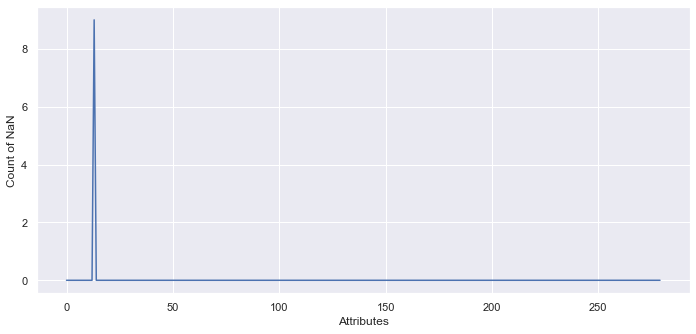

In [176]:
pd.isnull(df).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Text(0, 0.5, 'Count of NaN')

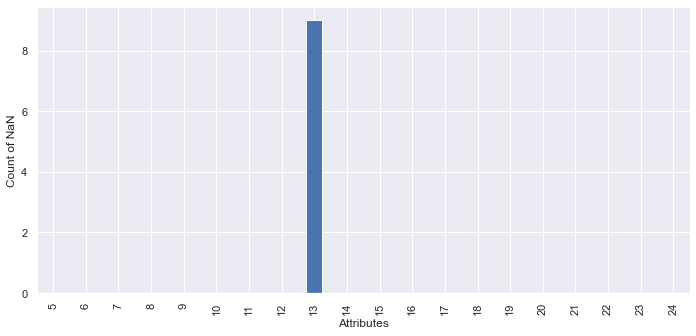

In [177]:
pd.isnull(df).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [178]:
df.drop(columns = 13, inplace=True)

In [179]:
df.shape

(9, 279)

In [180]:
data_no_missing = df.fillna(0)

Text(0, 0.5, 'Count of NaN')

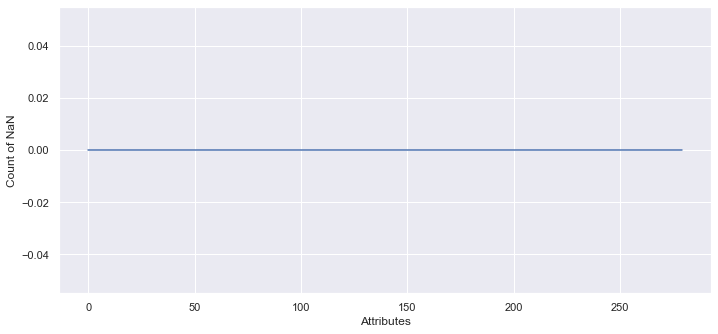

In [181]:
pd.isnull(data_no_missing).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [182]:
data_missing=pd.DataFrame(data_no_missing)
data_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,49,0,166,73,95,157,383,163,92,-18,...,0.0,5.6,-0.5,0,0,0.4,1.7,11.1,25.3,1
1,31,1,150,64,82,195,362,156,102,61,...,0.0,11.8,0.0,0,0,0.6,2.3,44.8,63.6,1
2,34,0,175,60,97,167,339,163,78,7,...,0.0,7.8,-2.5,0,0,0.0,3.0,11.1,38.7,10
3,36,0,168,75,92,194,387,175,83,-2,...,0.0,6.9,-1.7,0,0,0.4,2.1,9.4,28.3,10
4,18,0,175,60,102,135,379,167,73,91,...,-1.8,11.8,-2.0,0,0,0.6,1.4,17.1,29.7,10


In [183]:
X2 = data_missing.drop(columns = 279)
X2.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,49,0,166,73,95,157,383,163,92,-18,...,-0.1,0.0,5.6,-0.5,0,0,0.4,1.7,11.1,25.3
1,31,1,150,64,82,195,362,156,102,61,...,0.2,0.0,11.8,0.0,0,0,0.6,2.3,44.8,63.6
2,34,0,175,60,97,167,339,163,78,7,...,0.1,0.0,7.8,-2.5,0,0,0.0,3.0,11.1,38.7
3,36,0,168,75,92,194,387,175,83,-2,...,0.0,0.0,6.9,-1.7,0,0,0.4,2.1,9.4,28.3
4,18,0,175,60,102,135,379,167,73,91,...,-0.3,-1.8,11.8,-2.0,0,0,0.6,1.4,17.1,29.7


In [184]:
X2.shape

(9, 278)

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X2)


# make a prediction
ynew = LSVC_clf.predict(Xs)

# show the  predicted outputs
print("we have "+str(len(Xs))+" paitents to pridict their class ")
for i in range(len(Xs)):
	print( ynew[i])
ynew = LSVC_clf.predict(Xs)

# show the case of for each paitent
for i in range(len(Xs)):
    if ynew[i] == 1:
        print("Paitent number "+str(i+1)+" is predicted to have   NORMAL case ")
    elif ynew[i] == 2:
        print("Paitent number "+str(i+1)+" is predicted to have   Ischemic changes (Coronary Artery Disease) case")
    elif ynew[i] == 3:
        print("Paitent number "+str(i+1)+" is predicted to have   Old Anterior Myocardial Infarction case")
    elif ynew[i] == 4:
        print("Paitent number "+str(i+1)+" is predicted to have   Old Inferior Myocardial Infarction case")
    elif ynew[i] == 5:
        print("Paitent number "+str(i+1)+" is predicted to have   Sinus tachycardy case")
    elif ynew[i] == 6:
        print("Paitent number "+str(i+1)+" is predicted to have   Sinus bradycardy case")
    elif ynew[i] == 7:
        print("Paitent number "+str(i+1)+" is predicted to have   Ventricular Premature Contraction or PVC case")
    elif ynew[i] == 8:
        print( "Paitent number "+str(i+1)+" is predicted to have  Supraventricular Premature Contraction case")
    elif ynew[i] == 9:
        print("Paitent number "+str(i+1)+" is predicted to have   Left bundle branch block case")
    elif ynew[i] == 10:
        print("Paitent number "+str(i+1)+" is predicted to have   Right bundle branch block case")
    elif ynew[i] == 11:
        print("Paitent number "+str(i+1)+" is predicted to have   1. degree AtrioVentricular block case ")
    elif ynew[i] == 12:
        print("Paitent number "+str(i+1)+" is predicted to have   2. degree AV block case")
    elif ynew[i] == 13:
        print("Paitent number "+str(i+1)+" is predicted to have   3. degree AV block case")
    elif ynew[i] == 14:
        print("Paitent number "+str(i+1)+" is predicted to have   Left ventricule hypertrophy case")
    elif ynew[i] == 15:
        print("Paitent number "+str(i+1)+" is predicted to have   Atrial Fibrillation or Flutter case")
    elif ynew[i] == 16:
        print("Other or unlabeled case")
     
    else:
        print("invalid pridiction")
         
    
    
    
    
    
    
    

we have 9 paitents to pridict their class 
9
1
10
10
10
1
2
10
2
Paitent number 1 is predicted to have   Left bundle branch block case
Paitent number 2 is predicted to have   NORMAL case 
Paitent number 3 is predicted to have   Right bundle branch block case
Paitent number 4 is predicted to have   Right bundle branch block case
Paitent number 5 is predicted to have   Right bundle branch block case
Paitent number 6 is predicted to have   NORMAL case 
Paitent number 7 is predicted to have   Ischemic changes (Coronary Artery Disease) case
Paitent number 8 is predicted to have   Right bundle branch block case
Paitent number 9 is predicted to have   Ischemic changes (Coronary Artery Disease) case


In [186]:
`

SyntaxError: invalid syntax (<ipython-input-186-f6460d7d9d2b>, line 1)